Using this article as a basis: https://medium.com/analytics-vidhya/color-separation-in-an-image-using-kmeans-clustering-using-python-f994fa398454

In [136]:
import os
import cv2
import numpy as np
from numpy import random
import matplotlib
from matplotlib import image
import matplotlib.pyplot as plt
import math

img_rgb = np.load("mini_data/images_rgb.npy")
img_gray = np.load("mini_data/images_gray.npy")
img_rgb_sum = np.load("mini_data/images_rgbsum.npy")

#print(np.shape(img_rgb[228][0]))


def calcSqDistances(X,Kmus):
  N = np.shape(X)[0]
  K = np.shape(Kmus)[0]
  dist_array = np.zeros((N,K), dtype = np.float64)
  for i in range(N):
   for j in range(K):
    dist_array[i,j] = np.linalg.norm(X[i] - Kmus[j])
  return dist_array
  #return((-2 * X @ Kmus.T + np.sum(Kmus * Kmus, axis = 1).T).T + np.sum(X * X, axis = 1)).T

def determineRnk(sqDmat):
  low = np.argmin(sqDmat, axis = 1)
  rnk = np.identity(sqDmat.shape[1])[low]
  return rnk

def recalcMus(X, Rnk):
    Kmus = np.zeros((len(Rnk[0]), 2))
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk, axis=0))).T

def runKMeans(K):
  # For loop was meant to go across entire binary image set
  # With the current set-up, it took over an hour and a half
  # to run on this set before I interrupted it, so should most likely
  # test on one binary image
  X = img_rgb[10]# The image data we run clustering on
  N = np.shape(X)[0]
  D = np.shape(X)[1]

  Kmus = np.zeros((K,D))

  rand_inds = np.random.permutation(N)
  Kmus = X[rand_inds[0:K],:]
        

  for itr in range(1000):
      distmat = calcSqDistances(X, Kmus)

      rnk = determineRnk(distmat)

      mus_old = Kmus
      Kmus = recalcMus(X, rnk)
      if np.sum(np.abs(mus_old.reshape((-1,1)) - Kmus.reshape((-1,1)))) < 1e-6:
          break
    

  return Kmus

#not relevant here
def get_cluster_plot(Kmus, rows = 2): 
  '''
    : get a plot of what different clusters represent
    : takes as input the cluster location matrix
    '''
  fig,axs = plt.subplots(rows,5, figsize = (15,9))
  for i in range(len(Kmus)):
      cluster = Kmus[i].reshape(3,-1) * 255 
      axs[i//5][i%5].imshow(cluster, cmap = plt.cm.binary)
      axs[i//5][i%5].set_title(f'Cluster {i + 1}')


In [133]:
#np.shape(img_rgb[0])



In [228]:
tester = runKMeans(5)

#Still need a way to plot into a pie chart of one image

#tester = tester.reshape(tester.shape[1]*tester.shape[0],3)

#percent = []
#from sklearn.cluster import KMeans
#for i in range(len(img_rgb)):
    #kmeans = KMeans(n_clusters = 5)
    #s = kmeans.fit[i]
np.shape(tester)

(5, 256, 3)

In [229]:
from mpl_toolkits.axes_grid1 import ImageGrid
#fig = plt.figure(figsize=(4., 4.))
#grid = ImageGrid(fig, 111, nrows_ncols=(2,2), axes_pad=0.1)
#for ax,im in zip(grid,[tester]):
    #ax.imshow(im)
#plt.show()
#plt.imshow(img_rgb[15])
#plt.imshow(tester)
#get_cluster_plot(tester)



In [230]:
#from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
tester = tester.reshape((tester.shape[1]*tester.shape[0],3))



In [231]:
s = kmeans.fit(tester)


In [232]:
labels = kmeans.labels_
print(labels)
labels = list(labels)

[0 0 0 ... 4 4 4]


In [233]:
centroid = kmeans.cluster_centers_
print(centroid)

[[-94.87983028 -85.26321779 -87.97682857]
 [ 47.63828594  -1.83632203 -25.27362257]
 [-32.39376497 -49.40742158 -55.05161685]
 [ 96.99087763  73.87707641  59.85034607]
 [-72.21281951 -71.50504035 -74.74149454]]


In [234]:

labels.count(1)

68

In [243]:
abs(np.array(centroid/255))

array([[0.37207777, 0.33436556, 0.34500717],
       [0.18681681, 0.00720126, 0.09911225],
       [0.12703437, 0.19375459, 0.21588869],
       [0.38035638, 0.28971403, 0.23470724],
       [0.28318753, 0.28041192, 0.2931039 ]])

In [235]:
percent = []
for i in range(len(centroid)):
    j = labels.count(i)
    j = j/(len(labels))
    percent.append(j)
print(percent)

[0.35703125, 0.053125, 0.1375, 0.03359375, 0.41875]


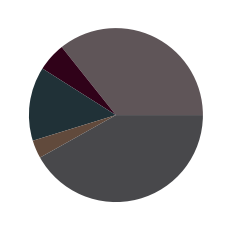

In [244]:
plt.pie(percent, colors = abs(np.array(centroid/255)))
plt.show()

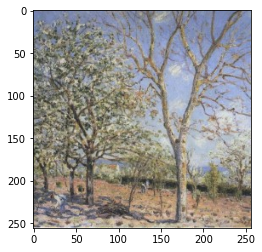

In [202]:
import cv2
img = cv2.imread('mini_data/images/Alfred_Sisley_29.jpg')
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [203]:
from sklearn.cluster import KMeans
img = img.reshape((img.shape[1]*img.shape[0],3))
kmeans = KMeans(n_clusters=5)
s = kmeans.fit(img)
labels = kmeans.labels_
print(labels)
labels = list(labels)

[3 3 3 ... 0 0 0]


In [204]:
centroid = kmeans.cluster_centers_
print(centroid)

[[183.25420275 186.1365985  192.53082017]
 [127.13738521 121.42556791 109.44991542]
 [165.58236099 154.79440714 137.15233688]
 [137.13670695 144.79541163 170.53653701]
 [ 88.26799141  84.34586466  74.00311493]]


In [205]:
percent = []
for i in range(len(centroid)):
    j = labels.count(i)
    j = j/(len(labels))
    percent.append(j)
print(percent)

[0.2096405029296875, 0.2525177001953125, 0.2338714599609375, 0.16119384765625, 0.1427764892578125]


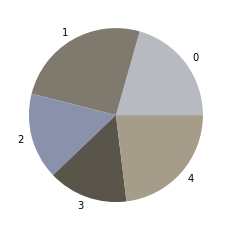

In [64]:
plt.pie(percent, colors = np.array(centroid/255), labels = np.arange(len(centroid)))
plt.show()
#Goal shown here

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 3)


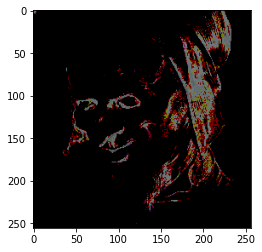

In [165]:
from PIL import Image
np.shape(img_rgb[1])
#len(img_rgb)
print(np.shape(img_rgb[0][0]))
plt.imshow(img_rgb[10])


In [66]:
class Point:

  def __init__(self, coordinates):
    self.coordinates = coordinates

In [67]:
class Cluster:

  def __init__(self, center, points):
    self.center = center
    self.points = points

In [68]:
def euclidean(p, q):
  n_dim = len(p.coordinates)
  return math.sqrt(sum([(p.coordinates[i] - q.coordinates[i]) ** 2 for i in range(n_dim)]))

In [69]:
def calculate_center(points):
  n_dim = len(points[0].coordinates)
  vals = [0.0 for i in range(n_dim)]
  for p in points:
    for i in range(n_dim):
      vals[i] += p.coordinates[i]
  coords = [(v / len(points)) for v in vals]
  return Point(coords)

In [70]:
def get_points(image_path):
  img = Image.open(image_path)
  img.thumbnail((200, 400))
  img = img.convert("RGB")
  w, h = img.size

  points = []
  for count, color in img.getcolors(w * h):
    for _ in range(count):
      points.append(Point(color))

  return points

In [160]:
def rgb_to_hex(rgb):
  return '#%s' % ''.join(('%02x' % p for p in rgb))

def get_colors(filename, n_colors=3):
  points = filename
  clusters = KMeans(n_clusters=n_colors).fit(points)
  clusters.sort(key=lambda c: len(c.points), reverse = True)
  rgbs = [map(int, c.center.coordinates) for c in clusters]
  return list(map(rgb_to_hex, rgbs))

In [72]:
def assign_points(self, clusters, points):
  plists = [[] for i in range(self.n_clusters)]

  for p in points:
    smallest_distance = float('inf')

    for i in range(self.n_clusters):
      distance = euclidean(p, clusters[i].center)
      if distance < smallest_distance:
        smallest_distance = distance
        idx = i

    plists[idx].append(p)

  return plists

def fit(self, points):
  clusters = [Cluster(center=p, points=[p]) for p in random.sample(points, self.n_clusters)]

  while True:

    plists = self.assign_points(clusters, points)

    diff = 0

    for i in range(self.n_clusters):
      if not plists[i]:
        continue
      old = clusters[i]
      center = self.calculate_center(plists[i])
      new = Cluster(center, plists[i])
      clusters[i] = new
      diff = max(diff, euclidean(old.center, new.center))

    if diff < self.min_diff:
      break

  return clusters

In [163]:

#colors = get_colors('mini_data/images/Alfred_Sisley_29.jpg', n_colors=5)
#colors

AttributeError: 'KMeans' object has no attribute 'sort'